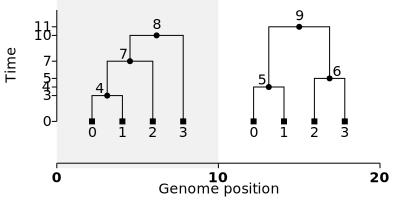

In [38]:
import io
import tskit

nodes = """\
is_sample time
1         0
1         0
1         0
1         0
0         3
0         4
0         5
0         7
0         10
0         11
"""

edges = """\
left   right   parent  child
0      10      4       0,1
0      10      7       2,4
0      10      8       3,7
10     20      5       0,1
10     20      6       2,3
10     20      9       5,6
"""

# sites = """\
# position ancestral_state
# """

# mutations = """\
# site node parent derived_state
# """

ts = tskit.load_text(
    nodes=io.StringIO(nodes),
    edges=io.StringIO(edges),
    # sites=io.StringIO(sites),
    # mutations=io.StringIO(mutations),
    strict=False,
)

ts.draw_svg(y_axis=True)

In [68]:
import msprime
ts = msprime.sim_ancestry(samples=4, recombination_rate=0.2, sequence_length=10, random_seed=1)

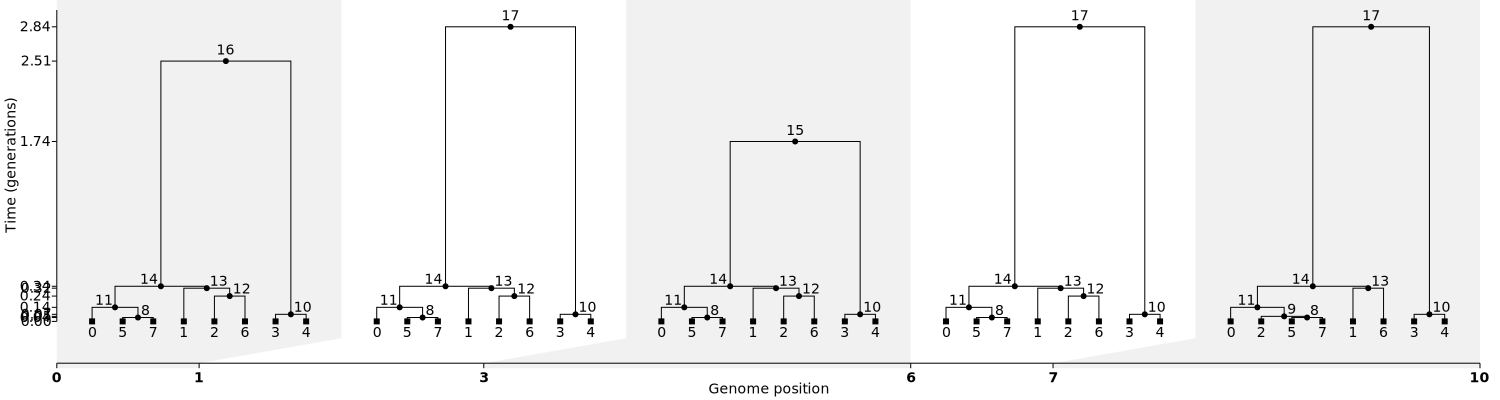

In [183]:
ts.draw_svg(y_axis=True, size=(1500,400))

In [182]:
# from IPython import display
# for e in ts.indexes_edge_insertion_order:
#     display.display(ts.draw_svg(size=(1000, 300), style=f'.a{ts.edges_parent[e]}.n{ts.edges_child[e]} > .edge {{stroke: cyan; stroke-width: 2px}}'))
#     # print(ts.edge(e))

In [47]:
from itertools import combinations

In [196]:
{k: v for k, v in mrcas.items() if v != tskit.NULL}

{(2, 6): 12, (3, 4): 10, (5, 7): 8}

In [215]:
mrcas = {(i, j): tskit.NULL for i, j in combinations(ts.samples(), 2)}
n = ts.num_nodes - 1
while ts.num_samples - 1 < n:
    if samples := samples_under_nodes[n]:
        print(n, samples)
        for s1, s2 in combinations(samples, 2):
            mrcas[s1, s2] = n
    n -= 1

16 {0, 1, 2, 3, 4, 5, 6, 7}
14 {0, 1, 2, 5, 6, 7}
13 {1, 2, 6}
12 {2, 6}
11 {0, 5, 7}
10 {3, 4}
8 {5, 7}


In [204]:
mrcas

{(0, 1): 14,
 (0, 2): 14,
 (0, 3): 16,
 (0, 4): 16,
 (0, 5): 11,
 (0, 6): 14,
 (0, 7): 11,
 (1, 2): 13,
 (1, 3): 16,
 (1, 4): 16,
 (1, 5): 14,
 (1, 6): 13,
 (1, 7): 14,
 (2, 3): 16,
 (2, 4): 16,
 (2, 5): 14,
 (2, 6): 12,
 (2, 7): 14,
 (3, 4): 10,
 (3, 5): 16,
 (3, 6): 16,
 (3, 7): 16,
 (4, 5): 16,
 (4, 6): 16,
 (4, 7): 16,
 (5, 6): 14,
 (5, 7): 8,
 (6, 7): 14}

In [181]:
# inner = 0
# for i in range(ts.num_nodes - ts.num_samples):
#     for j in range(inner + 1, ts.num_nodes - ts.num_samples):
#         print(i + ts.num_samples, j + ts.num_samples, samples_under_nodes[ts.num_samples:][i], samples_under_nodes[ts.num_samples:][j])
#     inner += 1

In [213]:
samples_under_nodes = [set() for _ in range(ts.num_nodes)]
parents = [tskit.NULL] * ts.num_nodes

for s in ts.samples():
    samples_under_nodes[s].add(s)

edges_out = ts.indexes_edge_removal_order
edges_in = ts.indexes_edge_insertion_order

tj, tk, t_left, tree_index, window_index = 0, 0, 0, 0, 0

while tj < ts.num_edges or t_left < ts.sequence_length:
    while tk < ts.num_edges and ts.edges_right[edges_out[tk]] == t_left:
        e = edges_out[tk]
        tk += 1
        child = ts.edges_child[e]
        parent = ts.edges_parent[e]
        while parent != tskit.NULL:
            samples_under_nodes[parent] -= samples_under_nodes[child]
            parent = ts.edges_parent[parent]

    while tj < ts.num_edges and ts.edges_left[edges_in[tj]] == t_left:
        e = edges_in[tj]
        tj += 1
        child = ts.edges_child[e]
        parent = ts.edges_parent[e]
        parents[child] = parent
        while parent != tskit.NULL:
            samples_under_nodes[parent] |= samples_under_nodes[child]
            parent = parents[parent]

    t_right = ts.sequence_length
    if tj < ts.num_edges:
        t_right = min(t_right, ts.edges_left[edges_in[tj]])
    if tk < ts.num_edges:
        t_right = min(t_right, ts.edges_right[edges_out[tk]])

    if tree_index == 0:
        break
    tree_index += 1
    t_left = t_right

In [214]:
samples_under_nodes

[{0},
 {1},
 {2},
 {3},
 {4},
 {5},
 {6},
 {7},
 {5, 7},
 set(),
 {3, 4},
 {0, 5, 7},
 {2, 6},
 {1, 2, 6},
 {0, 1, 2, 5, 6, 7},
 set(),
 {0, 1, 2, 3, 4, 5, 6, 7},
 set()]

In [138]:
ts.edges_right[edges_out[0]]

1.0

In [139]:
t_left

10.0

In [133]:
samples_under_nodes

[set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set(),
 set()]

In [64]:
ts.indexes_edge_insertion_order

array([ 0,  1,  6,  7,  8,  9,  2,  3,  4,  5, 10, 11], dtype=int32)

In [55]:
ts.edges_child[4]

2

In [58]:
ts.edges_parent

array([4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9], dtype=int32)

In [59]:
ts.edges_left

array([ 0.,  0., 10., 10., 10., 10.,  0.,  0.,  0.,  0., 10., 10.])

In [53]:
node

Node(id=8, flags=0, time=10.0, population=-1, individual=-1, metadata=b'')

1

In [43]:
ts.at_index(1).postorder()

array([0, 1, 5, 2, 3, 6, 9], dtype=int32)

In [51]:
# stack = []
# for n in ts.at_index(0).postorder():
#     node = ts.node(n)
        
#         # stack.insert

In [75]:
# mrcas = {(i, j): tskit.NULL for i, j in combinations(ts.samples(), 2)}
# last_parent = tskit.NULL
# last_child = tskit.NULL

# for e in ts.indexes_edge_insertion_order:
#     edge = ts.edge(e)
#     child = ts.node(edge.child)
#     if child.is_sample():
#         if edge.parent == last_parent:
#             mrcas[last_child.id, child.id] = edge.parent

#     last_child = child
#     last_parent = edge.parent

In [1]:
from itertools import combinations, product

In [2]:
def combine(samples):
    ij = list(combinations(samples, 2))
    ijk = [(i, j, k) for i, j, k in product(samples, repeat=3)
           if i != k and i != j and j != k]
    ijkl = [(i, j, k, l) for i, j in combinations(samples, 2)
            for k in range(len(samples))
            for l in range(k + 1, len(samples))
            if i != k and j != k and l != i and l != j]
    return ij, ijk, ijkl

In [26]:
def to_pairs(samples):
    ijij, ijik, ijkl = combine(samples)
    for i, j in ijij:
        yield i, j
    for i, j, k in ijik:
        yield i, j
        yield i, k
    for i, j, k, l in ijkl:
        yield i, j
        yield k, l

In [28]:
set(to_pairs(range(4)))

{(0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 3),
 (3, 0),
 (3, 1),
 (3, 2)}

In [31]:
set([tuple(sorted(p)) for p in to_pairs(range(4))])

{(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)}

In [22]:
set(to_pairs(range(4))) == set(filter(lambda r: r[0] != r[1], product(range(4), repeat=2)))

True